<a href="https://colab.research.google.com/github/taketaka-MU/hs-2023/blob/main/20230810/population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 数列を使った人口増加モデル

\begin{equation}
x_{n+1}=x_n+ r x_n
\end{equation}

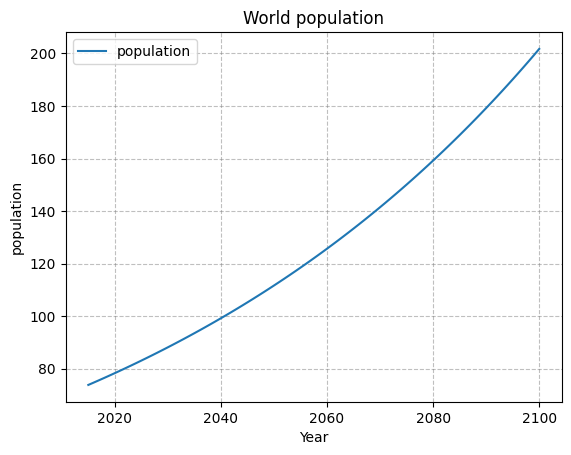

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calc_population(x0, year_start, year_end, growth_rate): # 人口増加モデル（離散版）
    gyear,gx = [year_start], [x0]
    x = x0
    for year in range(year_start+1, year_end+1):
      x = (1 + growth_rate) * x
      gyear.append(year)
      gx.append(x)
    return gyear,gx

year,x = calc_population(x0=73.8, year_start=2015, year_end=2100, growth_rate=0.0119)

plt.plot(year, x,label="population")
plt.xlabel('Year')
plt.ylabel('population')
plt.title('World population')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()

# 微分を使った人口増加モデル

\begin{equation}
\frac{dx}{dt}=ax
\end{equation}

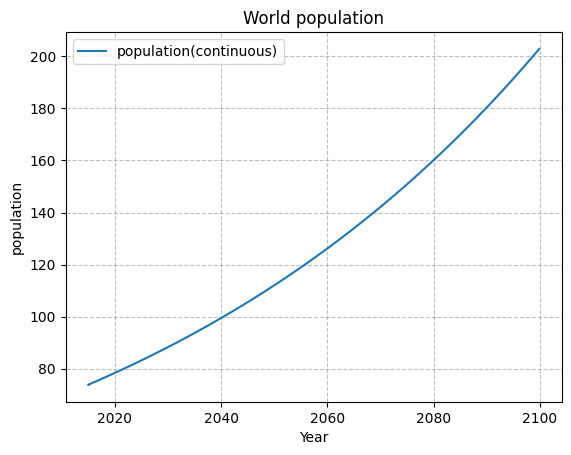

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def calc_population_diff(x0, year_start, year_end, growth_rate, dt): # 人口増加モデル（連続版）
    gyear,gx = [year_start], [x0]
    x = x0
    for i in range(int((year_end-year_start)/dt)):
      t = year_start+dt * i     # 時刻 (year)
      x += growth_rate * x * dt # 人口増加
      gyear.append(t)
      gx.append(x)
    return gyear,gx

year1,x1 = calc_population_diff(x0=73.8, year_start=2015, year_end=2100, growth_rate=0.0119,dt=0.1)

plt.plot(year1, x1,label="population(continuous)")
plt.xlabel('Year')
plt.ylabel('population')
plt.title('World population')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()

# 離散版と連続版のモデルを比べてみよう

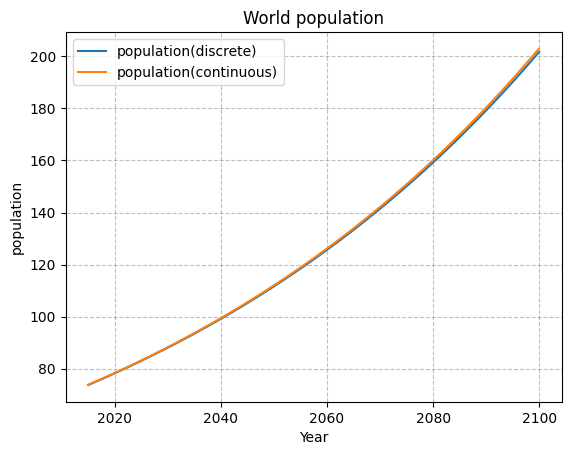

In [10]:
import numpy as np
import matplotlib.pyplot as plt


plt.plot(year, x,label="population(discrete)")
plt.plot(year1, x1,label="population(continuous)")
plt.xlabel('Year')
plt.ylabel('population')
plt.title('World population')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()

# 国連人口データ
https://population.un.org/wpp/Download/Standard/MostUsed/

In [24]:
import pandas as pd
df_pop=pd.DataFrame([
[1950, 2477675],
[1951,	 2520970],
[1952,	 2565291],
[1953,	 2615251],
[1954,	 2665307],
[1955,	 2718652],
[1956,	 2773493],
[1957,	 2828513],
[1958,	 2887221],
[1959,	 2944995],
[1960,	 2995589],
[1961,	 3042878],
[1962,	 3093864],
[1963,	 3159510],
[1964,	 3232049],
[1965,	 3302376],
[1966,	 3371848],
[1967,	 3440986],
[1968,	 3509910],
[1969,	 3583711],
[1970,	 3657599],
[1971,	 3733182],
[1972,	 3807145],
[1973,	 3882457],
[1974,	 3958046],
[1975,	 4032988],
[1976,	 4105886],
[1977,	 4179126],
[1978,	 4252419],
[1979,	 4326896],
[1980,	 4404270],
[1981,	 4483746],
[1982,	 4565510],
[1983,	 4650460],
[1984,	 4733308],
[1985,	 4818364],
[1986,	 4905097],
[1987,	 4995029],
[1988,	 5086940],
[1989,	 5177648],
[1990,	 5269760],
[1991,	 5362591],
[1992,	 5449900],
[1993,	 5535472],
[1994,	 5619395],
[1995,	 5702061],
[1996,	 5784378],
[1997,	 5865912],
[1998,	 5947050],
[1999,	 6027575],
[2000,	 6107942],
[2001,	 6189856],
[2002,	 6271638],
[2003,	 6353177],
[2004,	 6434620],
[2005,	 6516883],
[2006,	 6599469],
[2007,	 6683363],
[2008,	 6768534],
[2009,	 6854661],
[2010,	 6941951],
[2011,	 7029255],
[2012,	 7116996],
[2013,	 7206400],
[2014,	 7294787],
[2015,	 7383240],
[2016,	 7469955],
[2017,	 7556993],
[2018,	 7642651],
[2019,	 7724928],
[2020,	 7804974],
[2021,	 7876932]
],columns=['year', 'population'])

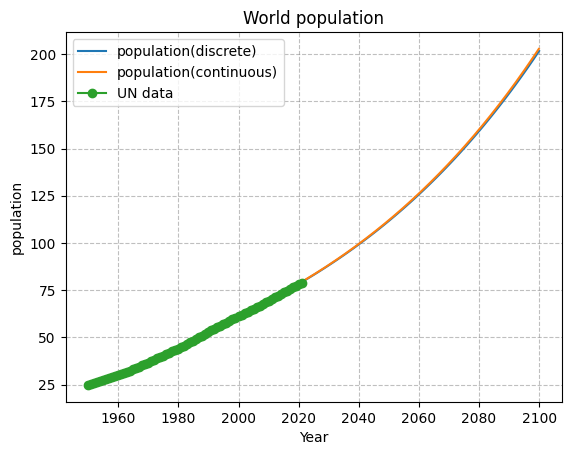

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(year, x,label="population(discrete)")
plt.plot(year1, x1,label="population(continuous)")
plt.plot(df_pop['year'], df_pop['population']/10**5, label="UN data", marker='o')
plt.xlabel('Year')
plt.ylabel('population')
plt.title('World population')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()

# 人口増加率の変化を見る

In [31]:
df_pop['growth_rate']=df_pop['population']
for i, row in df_pop.iterrows():
    if i==0:
      row['growth_rate']=0
    else:
      df_pop.loc[i, 'growth_rate'] = row['population']/df_pop.loc[i-1, 'population']

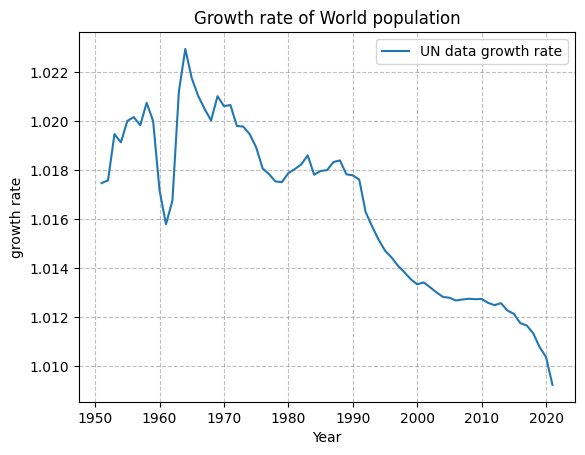

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(df_pop['year'][1:], df_pop['growth_rate'][1:], label="UN data growth rate")
plt.xlabel('Year')
plt.ylabel('growth rate')
plt.title('Growth rate of World population')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()